---
<h1><B> Fraud Analytics (CS6890)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment : </td>
<td><h3> 3 </td>
</tr>
<tr> 
<td><h3> Title : </td>
<td><h3> Identifying the outliers using spectral clustering </td>
</tr>
<tr> 
<td><h3> Team Details : </td>
<td>

<table>
<tr>
<th> <h3> Name </th>
<th> <h3> Roll Number </th>
</tr>



<tr> 
<td><h5> Manan Darji </td>
<td><h5> CS22MTECH14004 </td>
</tr>
<tr> 
<td><h5> Dhwani Jakhaniya </td>
<td><h5> CS22MTECH14011 </td>
</tr>
<tr> 
<td><h5> Ankit Sharma </td>
<td><h5> CS22MTECH12003 </td>
</tr>
<tr> 
<td><h5> Vishesh Kothari </td>
<td><h5> CS22MTECH12004 </td>
</tr>
<tr> 
<td><h5> Jayanti Mudliar </td>
<td><h5> CS22MTECH14001 </td>
</tr>

<table>



</td>
</tr>
<table>


In [ ]:
# Importing Libs
import math
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import cm as cm

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [ ]:
# Difined global color
CLR = (199, 25, 24)
CLR = [x/255 for x in CLR]

In [ ]:
# Just Upload the file provided and read file
df = pd.read_csv('/content/data.csv')

print(df.head()) 

# Reading Values
X = df.values
Y = df.index.values

# Setting values as INPUT variables
INP = X#_Test
INPy = Y#_Test

       cov1      cov2      cov3      cov4      cov5      cov6      cov7  \
0  0.997797  0.999888  0.215934  0.196713  0.000000  0.955616  0.998810   
1  0.994004  0.979902 -0.337135 -0.248634  0.000000  0.640812  0.553918   
2  0.947603  0.455667  0.001743  0.128610 -0.004054 -0.162069  0.960601   
3  0.396577  0.919933  0.496451  0.576824 -0.340718  0.802363  0.673710   
4  0.999893  0.327615  0.700477  0.315601  0.000000  0.300785  0.979009   

   sal_pur_rat  igst_itc_tot_itc_rat  lib_igst_itc_rat  
0    -0.032581              1.761759         -0.054329  
1    -0.032026             -0.629311         -0.053516  
2    -0.030209              1.535697         -0.054215  
3    -0.032058              0.449160         -0.054126  
4    -0.032224              1.762049         -0.054330  


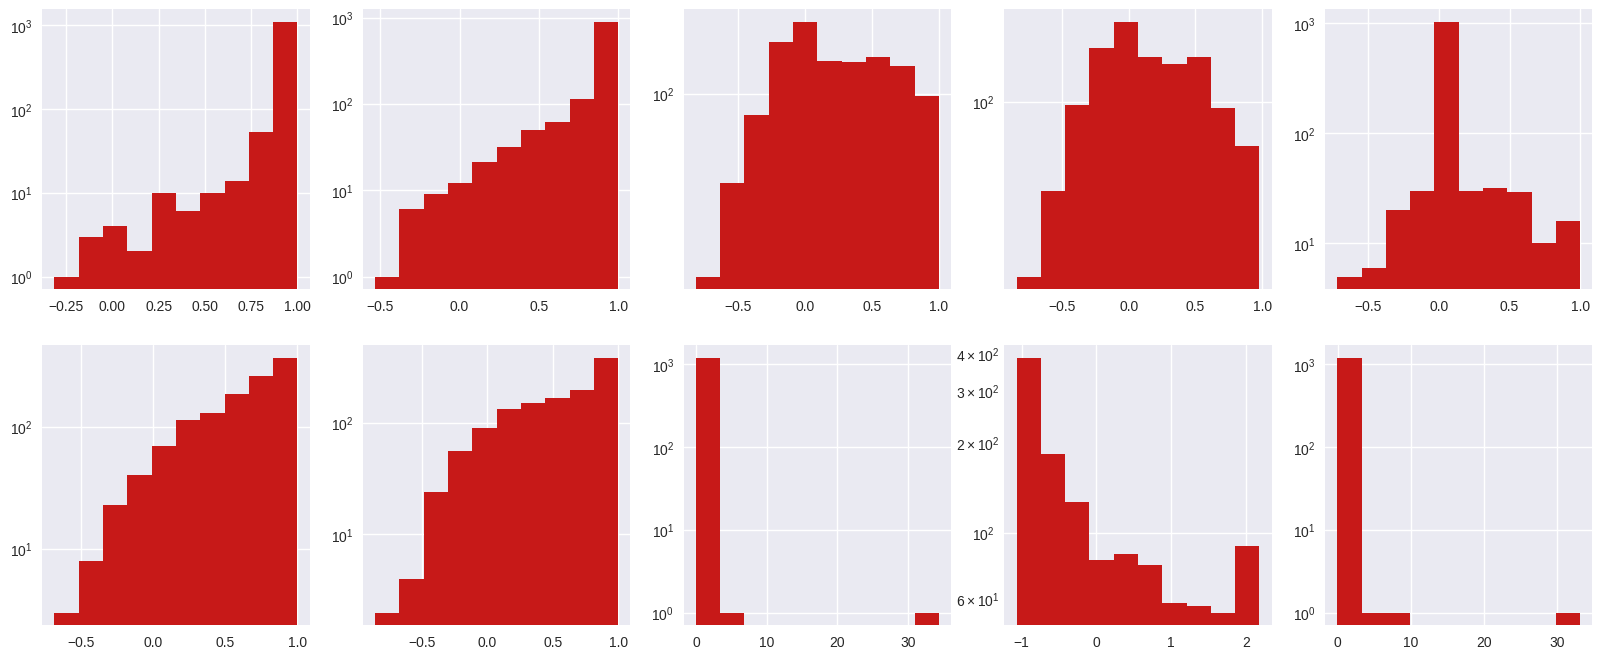

In [ ]:
fig, ax = plt.subplots(2, 5,figsize=(20,8))
ind = 0
for i in range(2):
  for j in range(5):
    ax[i,j].hist(INP[:,ind],color=CLR)
    ax[i,j].set_yscale('log')
    ind+=1
plt.show()

In [ ]:
# m1 = [0] * 10
# m2 = [0] * 10
# for val in INP:
#   for j,i in enumerate(m1):
#     m1[j] = max(m1[j],val[j])
#   for j,i in enumerate(m2):
#     m2[j] = min(m2[j],val[j])
# m1,m2

In [ ]:
from sklearn.preprocessing import normalize
# INP = normalize(INP, axis=0, norm='l1')


In [ ]:
# Difined global color
CLR = (199, 25, 24)
CLR = [x/255 for x in CLR]

Here I have Plotted the dataset in 5 dimentions( Using PCA )


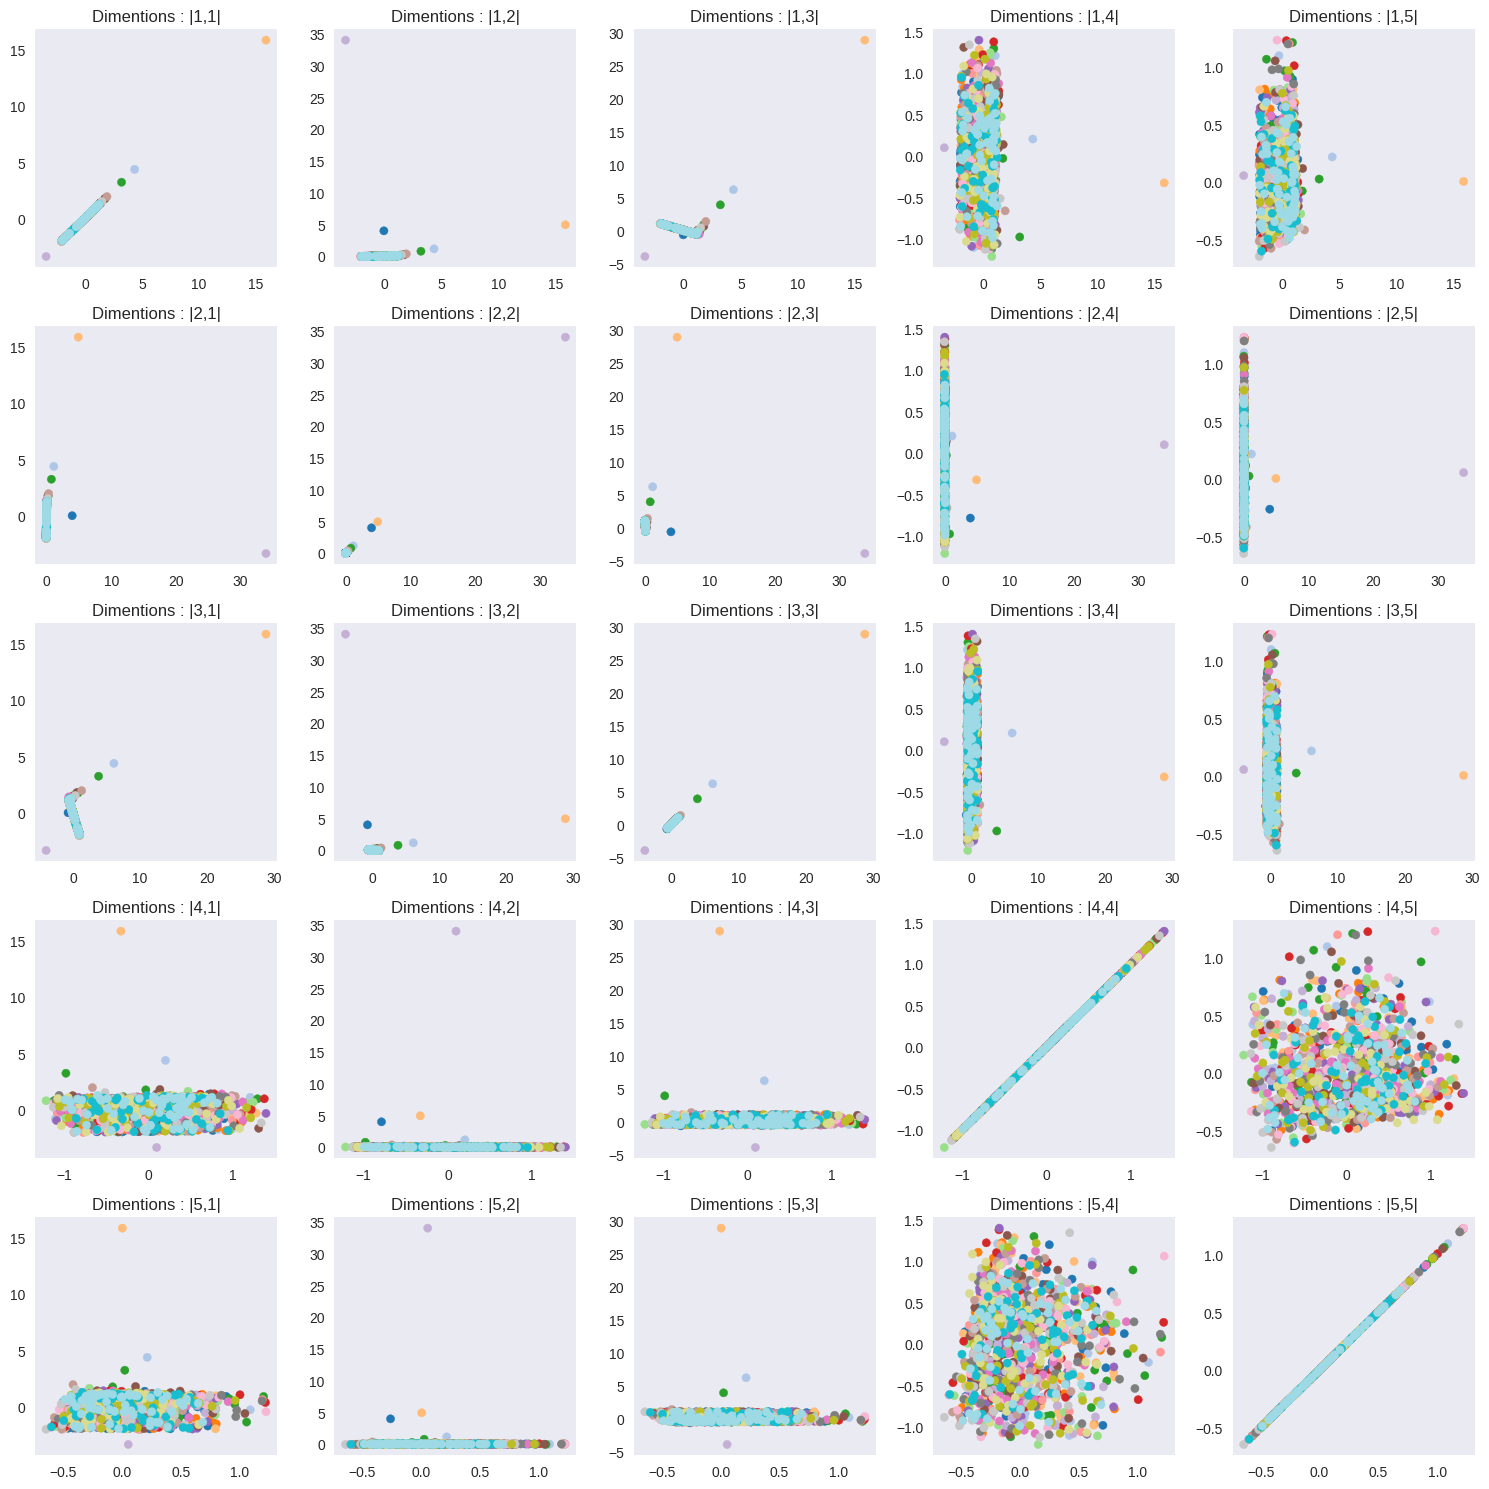

In [ ]:
# This is a simple function to visulize the multidimentional data
def ShowPCAplotDIM_NxN(X,Y,size=35,cmap = "tab20"):
  """
  This is a Simple Function to plot PCA Plot.
  """
  # Get the dimention of the data
  Dim = X.shape[1]
  plots = (Dim*Dim)
  # figure out number of rows and cols
  Cols = Rows = Dim
  S = 15//Cols
  p = 1
  # Init graph
  fig, ax = plt.subplots(Rows, Cols,figsize=(Cols * S,Rows * S))
  pi,pj = 0,0
  # Iter over all plots 
  for i in range(Dim):
    for j in range(Dim):
      # Plot Indivisual graph
      ax[pi,pj].set_title("Dimentions : |"+str(i+1)+","+str(j+1)+"|")
      ax[pi,pj].scatter(X[:,i], X[:,j], c=Y ,s=size,cmap=cmap)
      ax[pi,pj].grid()
      pj+=1
      if pj == Cols:
        pj = 0
        pi+= 1
  fig.tight_layout()
  plt.show()

print("Here I have Plotted the dataset in 5 dimentions( Using PCA )")
pca = PCA(n_components=5)
X5d =  pca.fit_transform(INP)
ShowPCAplotDIM_NxN(X5d,INPy)



In [ ]:
# Init the empty Matrix of (N x N), where N is size of dataset. 
Mat = np.zeros((INP.shape[0],INP.shape[0]))
i,j = 0,0

# Calculate the cosine similarity between all rows of the dataset.
for i in range(len(INP)):
  for j in range(i+1,len(INP)):
    X1, X2 = INP[i], INP[j]
    # Finding Cosine similarity
    Mat[i][j] = Mat[j][i] = np.dot(X1,X2)/(norm(X1)*norm(X2))


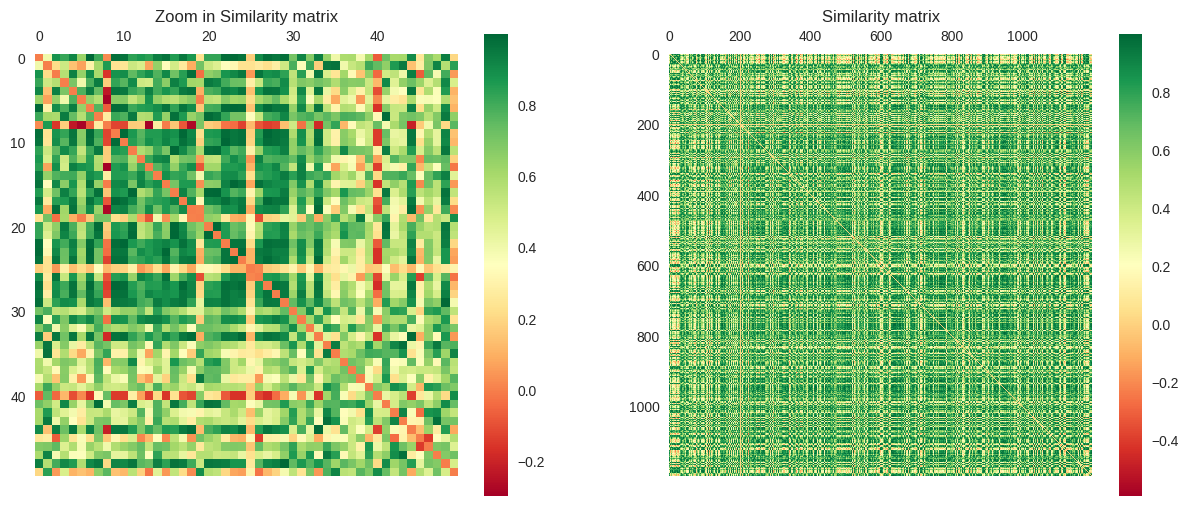

In [ ]:
cmap = cm.get_cmap('RdYlGn')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# ind = np.arange(1,res.shape[0]+1)

cax1 = ax1.matshow(Mat[:50,:50], interpolation='nearest', cmap=cmap)
ax1.set_title("Zoom in Similarity matrix")
ax1.grid()

cax2 = ax2.matshow(Mat, interpolation='nearest', cmap=cmap)
ax2.set_title("Similarity matrix")
ax2.grid()
fig.colorbar(cax1)
fig.colorbar(cax2)

plt.show()

In [ ]:
# Here we are thresolding on number of connections between graph node based on similarity
#  0.5 Works Best as per testing a diffrent values
Mat[Mat>0.5] = 1
Mat = Mat.astype(int)

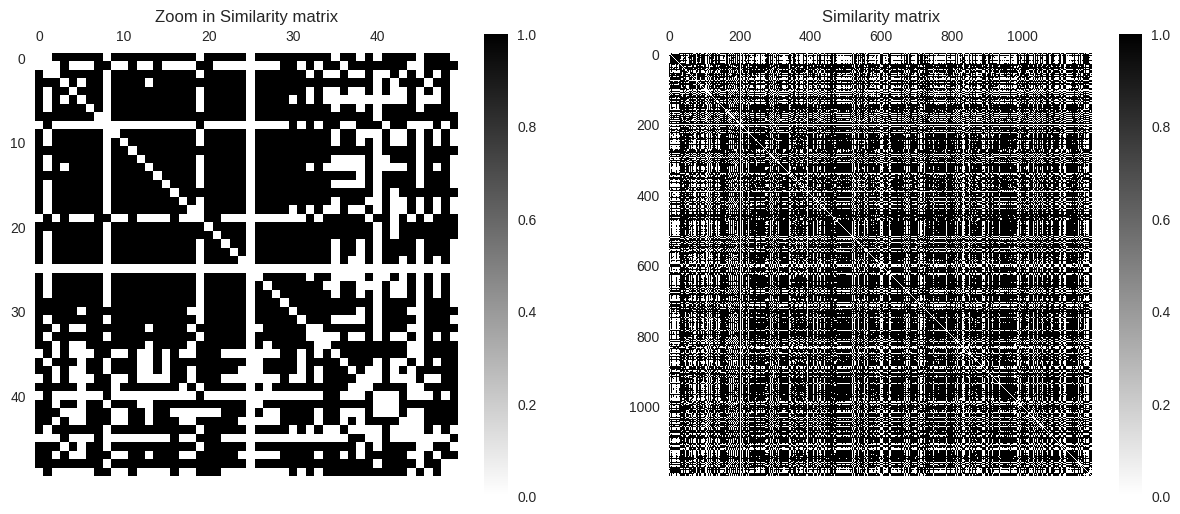

In [ ]:
cmap = cm.get_cmap('binary')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# ind = np.arange(1,res.shape[0]+1)

cax1 = ax1.matshow(Mat[:50,:50], interpolation='nearest', cmap=cmap)
ax1.set_title("Zoom in Similarity matrix")
ax1.grid()

cax2 = ax2.matshow(Mat, interpolation='nearest', cmap=cmap)
ax2.set_title("Similarity matrix")
ax2.grid()
fig.colorbar(cax1)
fig.colorbar(cax2)

plt.show()

In [ ]:
# finding the Degree Matrix
D = np.diag(Mat.sum(axis=1))

# finding the Graph Laplacian Matrix
L = D-Mat
print(L)

[[608   0  -1 ...  -1   0   0]
 [  0 927   0 ...  -1  -1  -1]
 [ -1   0 472 ...   0   0   0]
 ...
 [ -1  -1   0 ... 991  -1  -1]
 [  0  -1   0 ...  -1 852  -1]
 [  0  -1   0 ...  -1  -1 796]]


In [ ]:
# Finding the Eigenvalues of Graph Laplacian
vals, vecs = np.linalg.eig(L)

In [ ]:
# Sorting the Eigenvalues of Graph Laplacian
data = list(zip(vals,vecs))
res = sorted(data, key = lambda x: x[0])
res = np.asarray(res)

In [ ]:
res.shape

(1199, 2)

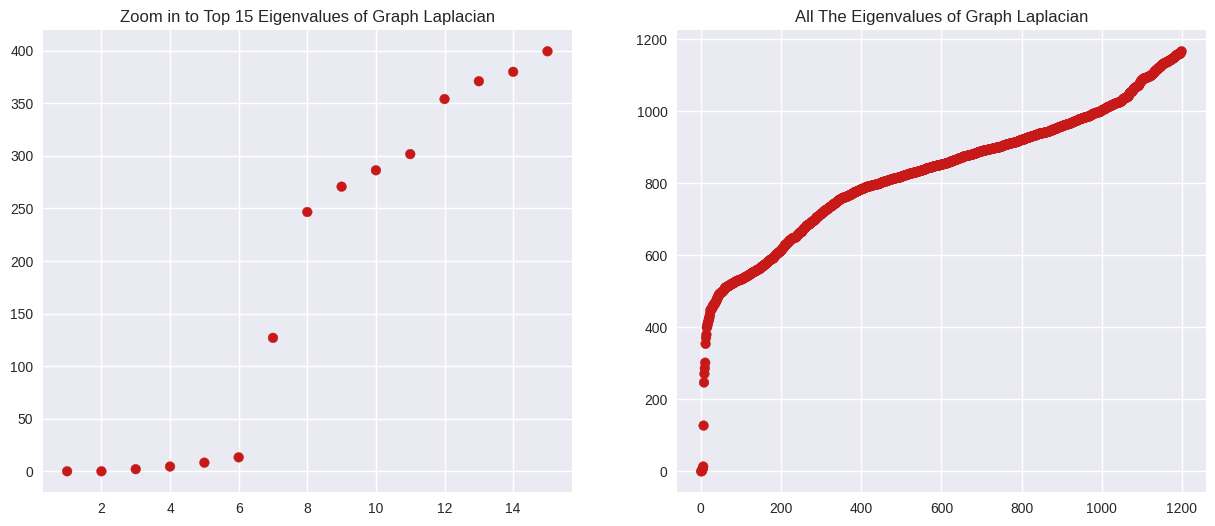

In [ ]:
# Plotting The Sorted Eigenvalues of Graph Laplacian
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
Th = 15
ind = np.arange(1,res.shape[0]+1)
clrmap = [CLR] * Th
ax1.scatter(ind[:Th],res[:Th,0],c=clrmap)
ax1.set_title("Zoom in to Top "+str(Th)+" Eigenvalues of Graph Laplacian")
clrmap = [CLR] * res.shape[0]
ax2.scatter(ind[:],res[:,0],c=clrmap)
ax2.set_title("All The Eigenvalues of Graph Laplacian")
plt.show()

In [ ]:
# Hyper Perameter tuning for KMeans
KLoss = []
MinVal , MinInd = 999999, 0
EigenGapAt = 8
for K in range(2,EigenGapAt):
  # Kmeans for k clusters
  kmeans = KMeans(n_clusters=K)
  # vecs= vecs.real
  # fitting Kmeans
  kmeans.fit(vecs[:,1:K])
  # finding Loss
  loss = kmeans.inertia_
  KLoss.append(loss)
  # Finding Lowest loss
  if(MinVal >= loss):
    MinVal = loss
    MinInd = K

  print("Loss for K = "+ str(K) +" is %1.6f "%loss)
print()
print("Minimum Possible Loss : %1.6f "%MinVal , "| K : "+ str(MinInd))

# Calculating Again for Best K
K = MinInd
kmeans = KMeans(n_clusters=K)
# vecs= vecs.real
kmeans.fit(vecs[:,1:K])
# Finding color map / clusters
colors = kmeans.labels_

Loss for K = 2 is 0.125239 
Loss for K = 3 is 0.038075 
Loss for K = 4 is 0.001654 
Loss for K = 5 is 0.000029 
Loss for K = 6 is 0.000029 
Loss for K = 7 is 0.000471 

Minimum Possible Loss : 0.000029  | K : 6


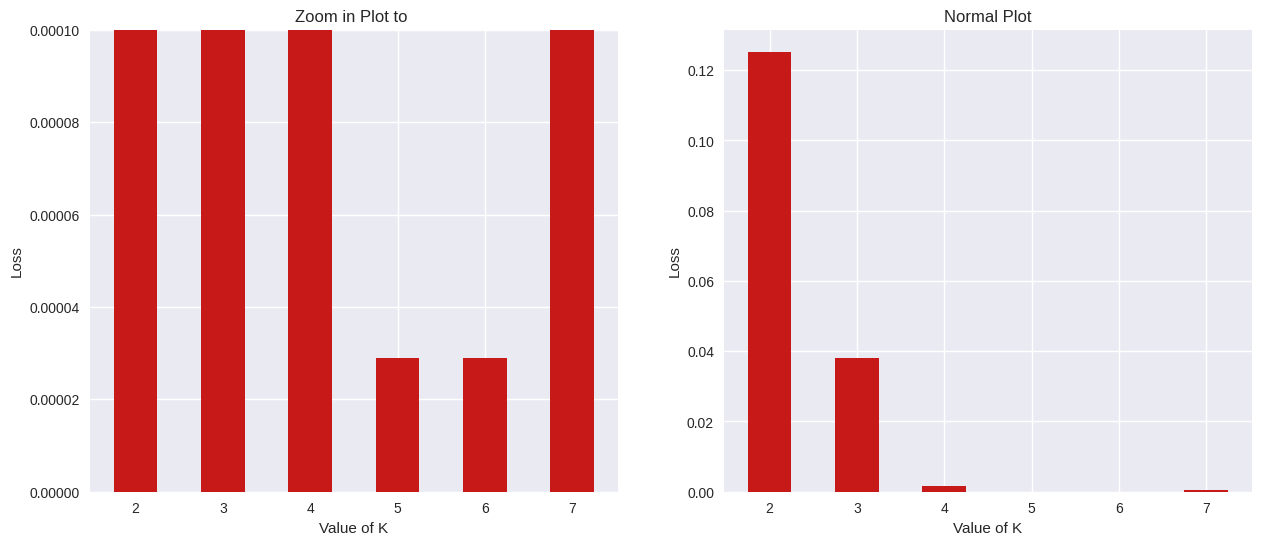

In [ ]:
Xax = list(range(2,EigenGapAt))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ind = np.arange(1,res.shape[0]+1)

ax1.bar(Xax, KLoss, color = CLR ,width = 0.5)
ax1.set_ylim(0,0.0001)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Value of K")
ax1.set_title("Zoom in Plot to ")

ax2.bar(Xax, KLoss, color = CLR ,width = 0.5)
ax2.set_title("Normal Plot")
ax2.set_xlabel("Value of K")
ax2.set_ylabel("Loss")

plt.show()

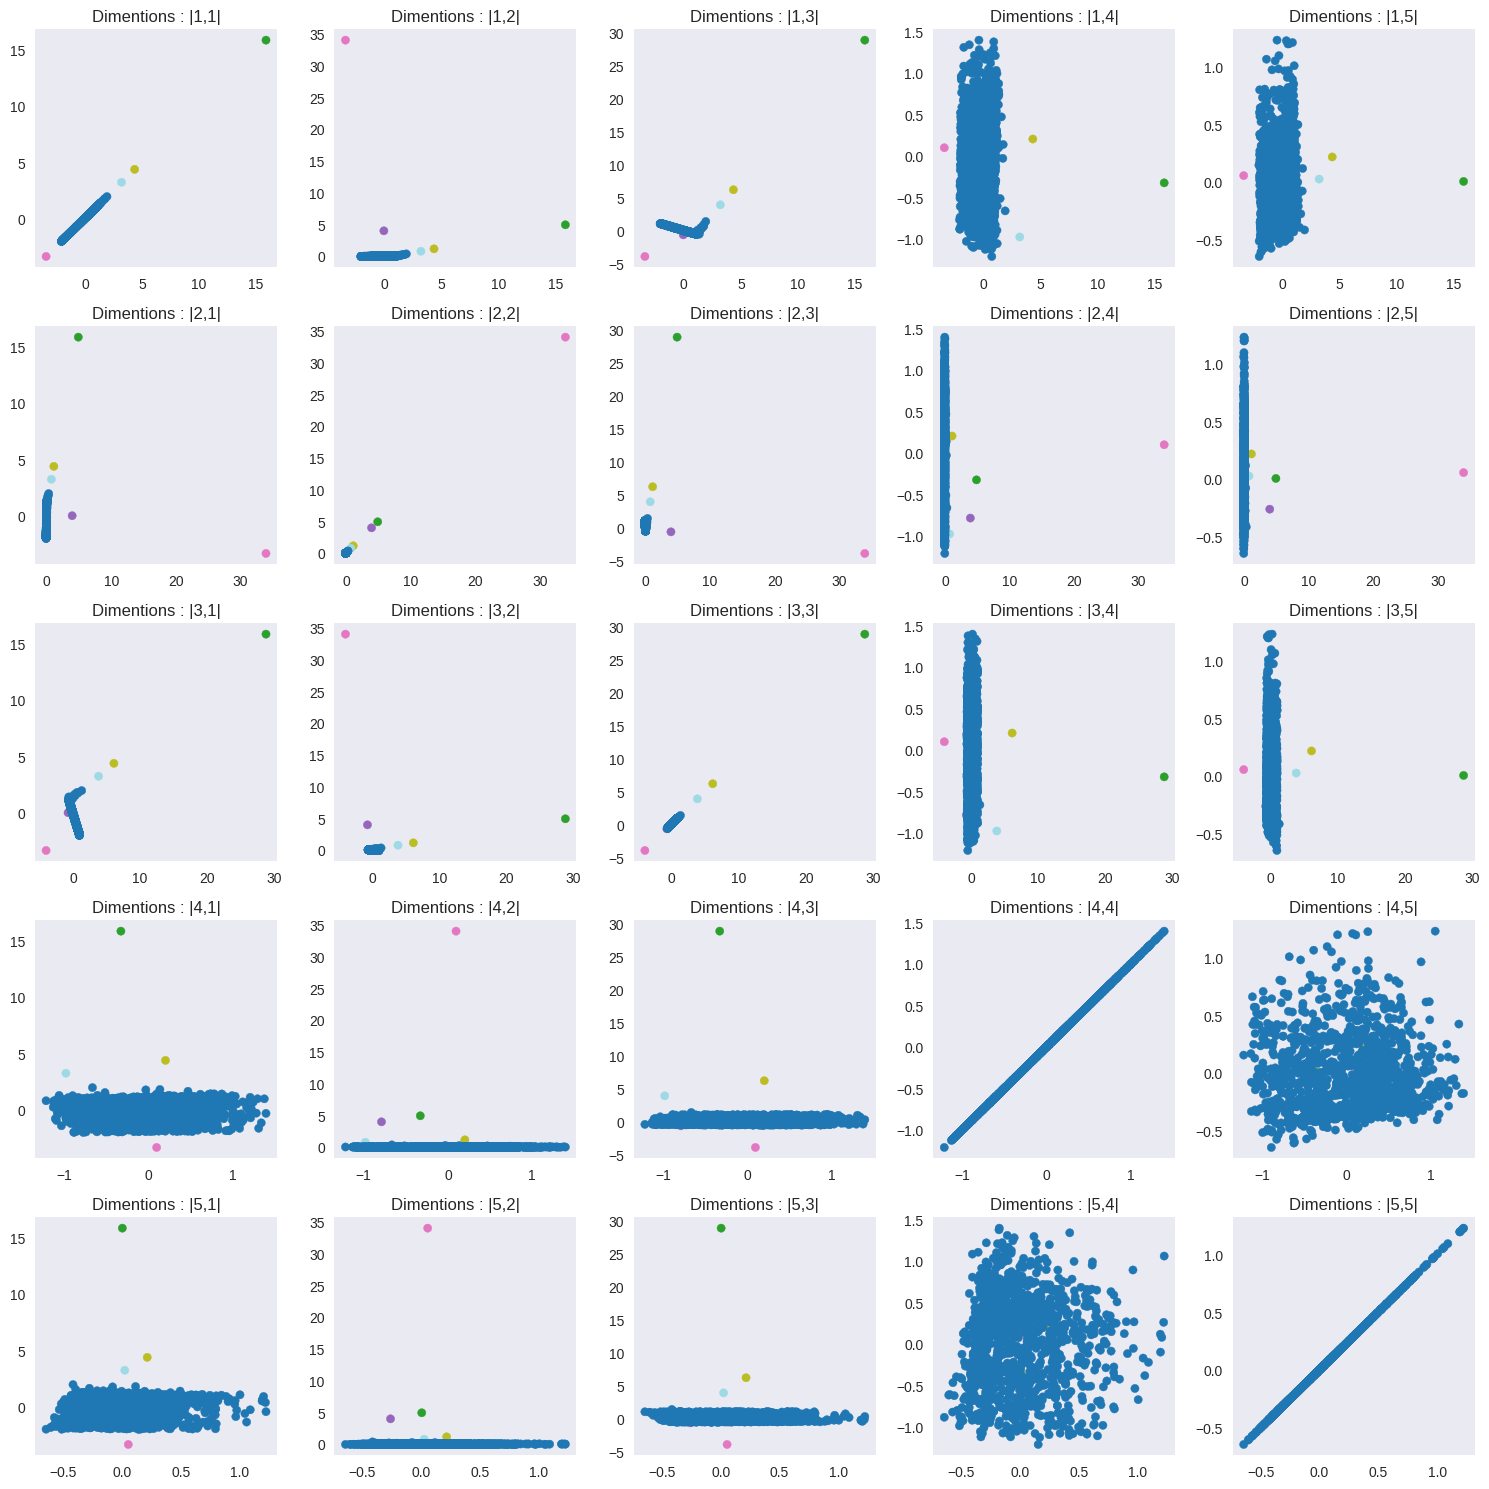

In [ ]:
pca = PCA(n_components=5)
X5d =  pca.fit_transform(INP)
ShowPCAplotDIM_NxN(X5d,colors,35,cmap="tab20")

In [ ]:
# Merging all Outlier in one cluster

# Finding Outlier per cluster
OutlierPerCluster = [0] * K
for i in colors:
  OutlierPerCluster[i]+=1
print("Outlier Per Cluster : ",OutlierPerCluster)

# Finding Best/Majority Cluster [Normal Nodes]
M = OutlierPerCluster.index(max(OutlierPerCluster))

# Setting all outlier as 1
for j in range(len(colors)):
  if colors[j] != M:
    colors[j] = 0
  else:
    colors[j] = 1


Outlier Per Cluster :  [1194, 1, 1, 1, 1, 1]


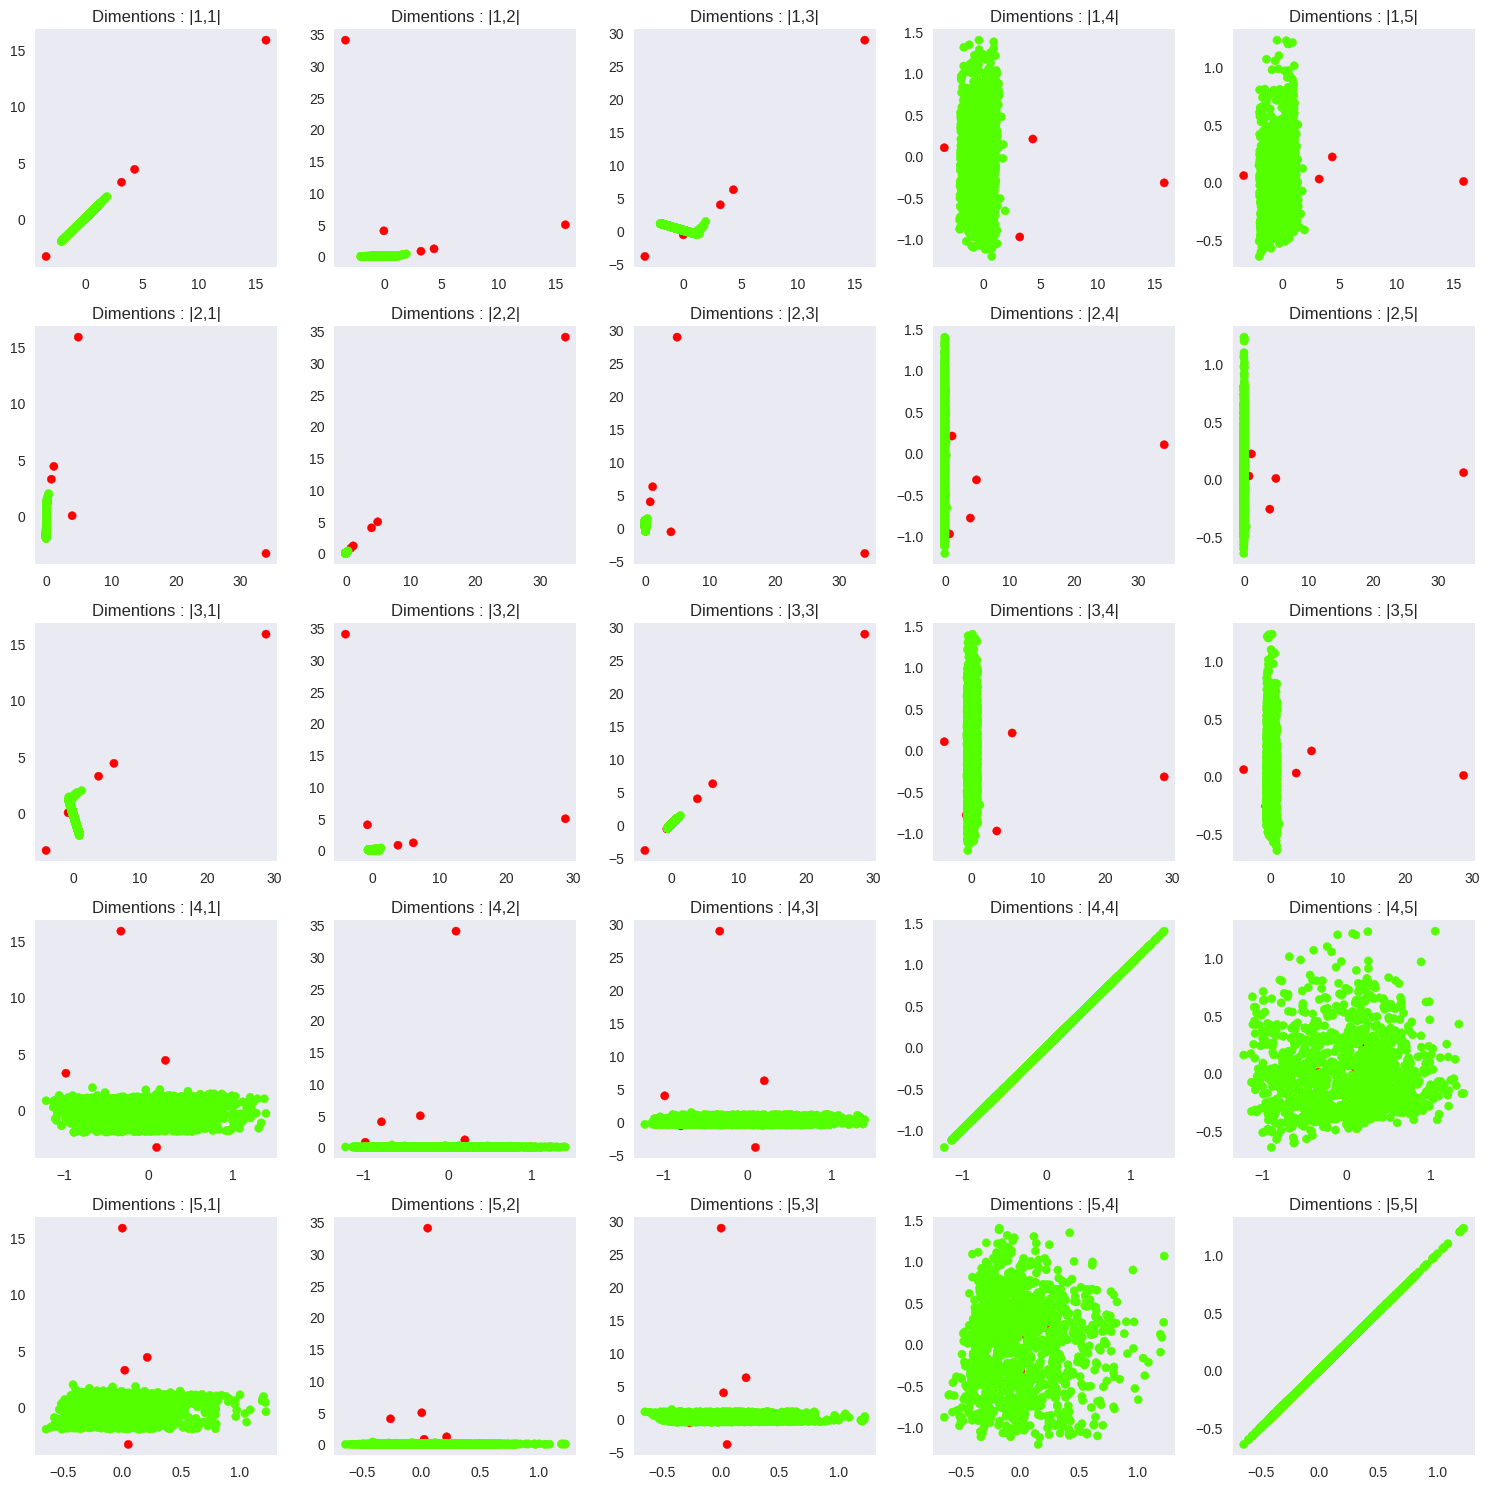

In [ ]:
ShowPCAplotDIM_NxN(X5d,colors,35,cmap="prism")

In [ ]:
# Finding Total OutLiers
cnt = 0
print("Outlier Indexs :",end=' ')
for i in range(len(colors)):
  if colors[i] == 0:
    print(i,end=' , ')
    cnt+=1

print()
print("Total Outliers :",cnt)

Outlier Indexs : 25 , 102 , 202 , 249 , 591 , 
Total Outliers : 5
